# Assignment 1 **<font color="blue"> (15 points )<font>**

------
### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. Good luck!  
  

In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## Question 1 <font color="blue">(1 point)</font>

  1. **<font color="blue">(0.5 points)</font>** Write a Python **function** that takes two **positive integers** and returns their **greatest common divisor**. In case you pass a negative integer to the function it must return the following string **in red**: <br> <font color="red"> "This function takes only positive integers!" </font>
  2. **<font color="blue">(0.5 points)</font>** Write a function that prints all the prime numbers less than or equal to $n$, where $n$ is a parameter to be passed to the function. If $n \leq 1$ the function returns <br>
<font color="red">"No prime number was found!"</span>.

### Question 1 - Part 1: Greatest Common Divisor
Explanation of the approach:
- Using Euclidean algorithm for GCD calculation
- Implementing error checking for negative integers
- Using provided color formatting for error messages

In [ ]:
def gcd(a, b):
    # Check for positive integers first
    if a <= 0 or b <= 0:
        return bcolors.RED + "This function takes only positive integers!" + bcolors.ENDC

    # Apply Euclidean algorithm
    while b:
        a, b = b, a % b
    return a

# Test cases to demonstrate functionality
print("Test cases for GCD function:")
print(f"GCD of 12 and 18: {gcd(12, 18)}")
print(f"GCD of -4 and 8: {gcd(-4, 8)}")

Test cases for GCD function:
GCD of 12 and 18: 6
GCD of -4 and 8: This function takes only positive integers!


### Question 1 - Part 2: Prime Numbers
Explanation of the approach:
- Using Sieve of Eratosthenes for efficient prime number generation
- Implementing boundary check for n ≤ 1
- Using provided color formatting for error message

In [ ]:
def print_primes(n):
    # Check if n is less than or equal to 1
    if n <= 1:
        return bcolors.RED + "No prime number was found!" + bcolors.ENDC

    # Initialize the sieve array
    is_prime = [True] * (n + 1)
    is_prime[0] = is_prime[1] = False

    # Apply Sieve of Eratosthenes algorithm
    for i in range(2, int(n ** 0.5) + 1):
        if is_prime[i]:
            for j in range(i * i, n + 1, i):
                is_prime[j] = False

    # Collect prime numbers
    primes = [num for num in range(2, n + 1) if is_prime[num]]
    print(f"Prime numbers less than or equal to {n}:", primes)

# Test cases
print("\nTest cases for print_primes function:")
print(print_primes(1))
print_primes(20)


Test cases for print_primes function:
No prime number was found!
Prime numbers less than or equal to 20: [2, 3, 5, 7, 11, 13, 17, 19]


## Question 2 <font color="blue">(6 points)</font>
Let $\mathbf X\sim \mbox{Exp}(\lambda)$, with parameter $\lambda = 1.2$.
  1. **<font color="blue">(0.5 points)</font>** What is the population mean?
  2. **<font color="blue">(1 point)</font>**  Generate $100$ different samples of $\mathbf X$, namely, $S_{100}, S_{200}, S_{300}, \dots, S_{10000}$, where indeces denote the number of observations (sample size) in each sample.
  3. **<font color="blue">(1.5 points)</font> Estimate** the population mean using each sample and explain the rationale behind your estimation.
  4. **<font color="blue">(1 point)</font>** Applying **appropriate** methods visualize and describe the values obtained in the previous step.
  5. **<font color="blue">(2 points)</font>** Finally, draw an inference about the population mean and its relation with sample means, based on visualized results in step 4.

### Question 2: Exponential Distribution Analysis
Part 1: Population Mean
- For an exponential distribution with λ = 1.2, the population mean is 1/λ

In [ ]:
# Import only necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate population mean
lambda_param = 1.2
population_mean = 1/lambda_param
print(f"Population mean: {population_mean:.4f}")

Population mean: 0.8333


Part 2 & 3: Sample Generation and Mean Estimation
- Generating 100 different samples with increasing sizes
- Using sample mean as an estimator (maximum likelihood estimator for exponential distribution)

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate samples
sample_sizes = np.arange(100, 10100, 100)
samples = [np.random.exponential(scale=1/lambda_param, size=size)
          for size in sample_sizes]

# Calculate sample means
sample_means = [np.mean(sample) for sample in samples]

### Question 2: Exponential Distribution Analysis
Part 4: Visualization of Results
- Creating multiple visualizations to understand the behavior of sample means
- Including confidence intervals to show estimation uncertainty
- Comparing sample means with the true population mean

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Sample Size')

Text(0, 0.5, 'Mean')

Text(0.5, 1.0, 'Sample Means vs Population Mean')

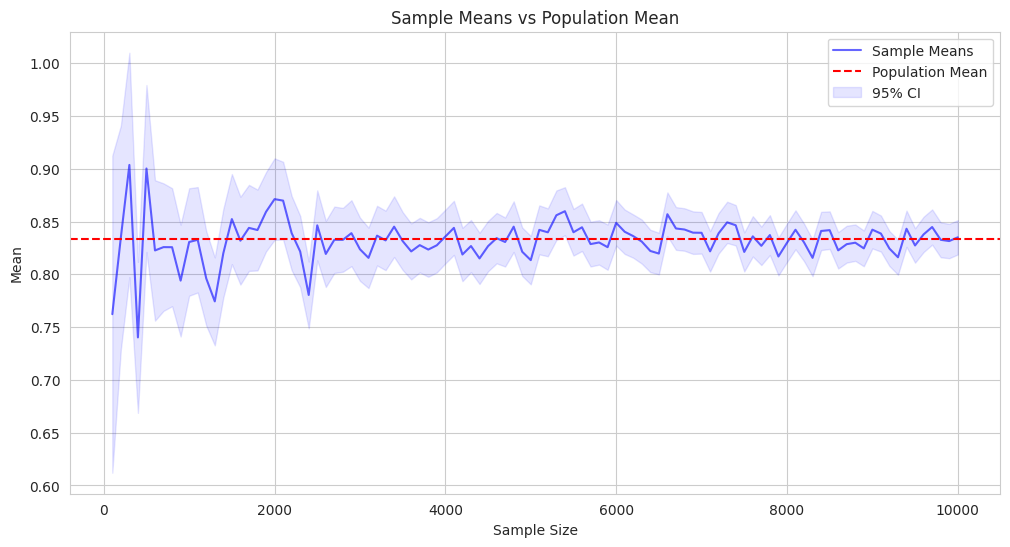

In [ ]:
# Create visualization of sample means
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot sample means and population mean
plt.plot(sample_sizes, sample_means, 'b-', label='Sample Means', alpha=0.6)
plt.axhline(y=population_mean, color='r', linestyle='--',
            label='Population Mean')

# Calculate and plot confidence intervals
std_errors = [np.std(sample, ddof=1)/np.sqrt(size)
              for sample, size in zip(samples, sample_sizes)]
ci_upper = [mean + 1.96*se for mean, se in zip(sample_means, std_errors)]
ci_lower = [mean - 1.96*se for mean, se in zip(sample_means, std_errors)]

plt.fill_between(sample_sizes, ci_lower, ci_upper,
                 color='b', alpha=0.1, label='95% CI')

plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.title('Sample Means vs Population Mean')
plt.legend()
plt.show()

Part 5: Statistical Inference
Based on the visualized results, we can draw several conclusions:
1. The sample means converge to the true population mean (1/λ ≈ 0.8333) as sample size increases
2. The confidence intervals narrow with larger sample sizes, indicating increased precision
3. This demonstrates the Law of Large Numbers and the consistency of our estimator
4. The variation in sample means decreases with larger sample sizes, as expected from statistical theory

## Question 3 <font color="blue">(8 points)</font>
In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to fix the seed to $111$ prior to
starting.
  
  1. **<font color="blue">(0.25 points)</font>** Create a vector `x` containing $100$ observations drawn from a $\mathcal{N}(0, 1)$ distribution as your feature.
  2. **<font color="blue">(0.25 points)</font>** Create a vector, `eps` (for $\epsilon$), containing $100$ observations drawn from a $\mathcal{N}(0, 0.25)$.
  3. **<font color="blue">(0.5 points)</font>** Using `x` and `eps` generate a vector `y` according to the model $y = −1 + 0.5x + \epsilon$.
  4. **<font color="blue">(0.5 points)</font>** Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.
  5. **<font color="blue">(2 points)</font>** Fit a least squares linear model to predict `y` using `x` . Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$?
  6. **<font color="blue">(2 point)</font>** Display the least squares line on the scatterplot obtained in part 4. Draw the population regression line on the plot, in a different color. Create an appropriate legend.
  7. **<font color="blue">(2.5 points)</font>** Explain how the result would change if you generate the data with less noise and repeat all steps 1 to 6? What about more noise?

### Linear Regression Analysis
First, I'll set up the environment and generate the data.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set the seed as specified in the question
np.random.seed(111)

# 1. Generate feature vector x
x = np.random.normal(0, 1, 100)

# 2. Generate noise vector epsilon
eps = np.random.normal(0, 0.25, 100)

# 3. Generate response variable y
y = -1 + 0.5*x + eps

Part 4: Scatterplot Analysis
Creating a scatterplot to visualize the relationship between x and y:
- Observe the linear relationship
- Note the spread of points due to the noise term
- Examine the overall pattern

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Relationship between x and y')

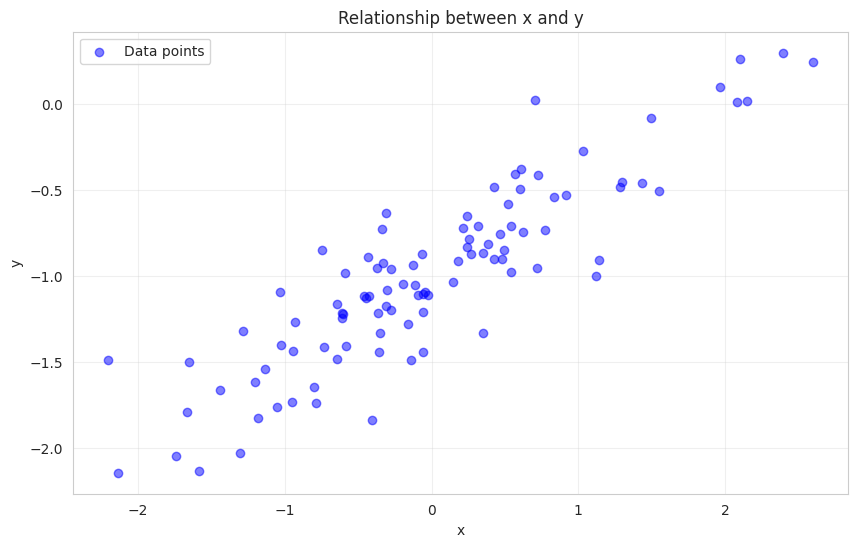

In [ ]:
# Create initial scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relationship between x and y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Part 5: Least Squares Linear Model
Fitting a linear regression model to estimate β₀ and β₁:
- Using sklearn's LinearRegression
- Comparing estimated coefficients with true values
- Analyzing model fit

In [ ]:
# Reshape x for sklearn
X = x.reshape(-1, 1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Extract and print coefficients
beta0_hat = model.intercept_
beta1_hat = model.coef_[0]

print(f"True β₀ = -1, Estimated β₀ = {beta0_hat:.4f}")
print(f"True β₁ = 0.5, Estimated β₁ = {beta1_hat:.4f}")
print(f"R² score: {model.score(X, y):.4f}")

LinearRegression()

True β₀ = -1, Estimated β₀ = -0.9916
True β₁ = 0.5, Estimated β₁ = 0.4804
R² score: 0.7866


Part 6: Visualization with Regression Lines
Adding both the least squares line and the true population regression line to our plot:
- Blue points: observed data
- Red line: fitted least squares line
- Green dashed line: true population regression line

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Linear Regression Analysis')

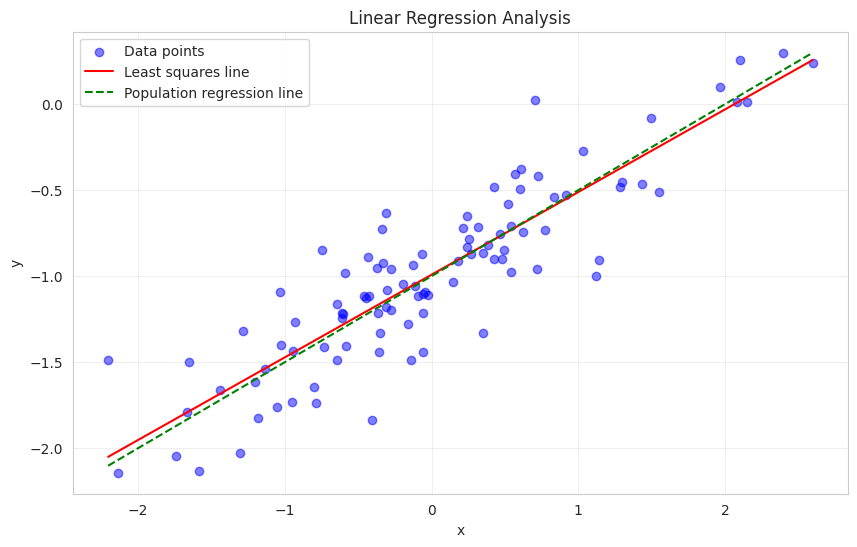

In [ ]:
# Create plot with both lines
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='blue', label='Data points')

# Add least squares line
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, model.predict(x_range.reshape(-1, 1)),
         'r-', label='Least squares line')

# Add population regression line
plt.plot(x_range, -1 + 0.5 * x_range,
         'g--', label='Population regression line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Part 7: Effect of Noise Level
To understand the impact of noise, we'll compare results with:
1. Less noise (σ = 0.1)
2. More noise (σ = 0.5)

This analysis will demonstrate how noise affects:
- Parameter estimation accuracy
- Model fit quality
- Visual relationship between variables

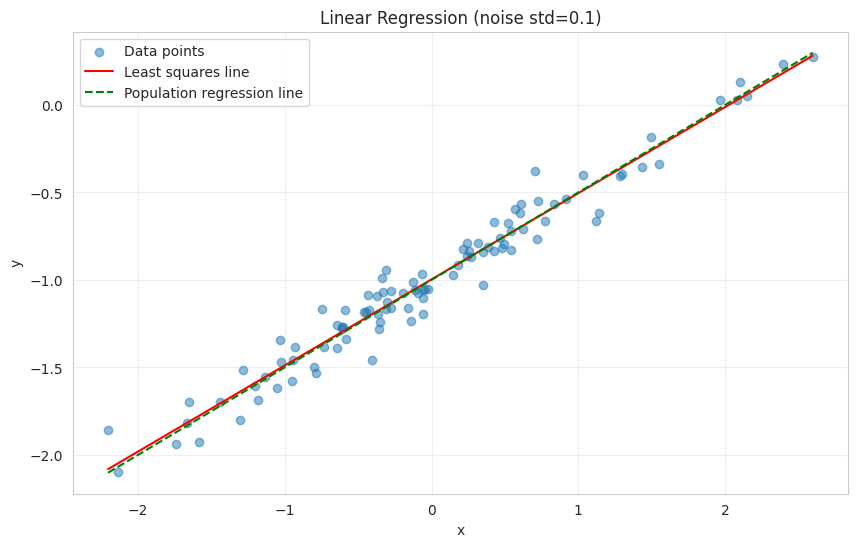


Results for noise_std = 0.1:
True β₀ = -1, Estimated β₀ = -0.9966
True β₁ = 0.5, Estimated β₁ = 0.4921
R² score: 0.9603


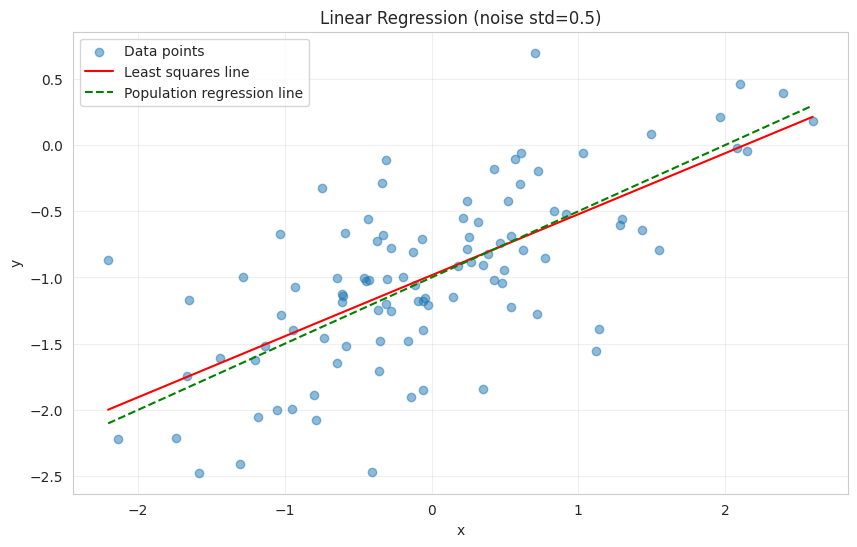


Results for noise_std = 0.5:
True β₀ = -1, Estimated β₀ = -0.9831
True β₁ = 0.5, Estimated β₁ = 0.4607
R² score: 0.4588


In [ ]:
def analyze_with_noise(noise_std):
    """
    Analyze regression with different noise levels
    """
    # Reset seed for consistency
    np.random.seed(111)

    # Generate data with specified noise
    x = np.random.normal(0, 1, 100)
    eps = np.random.normal(0, noise_std, 100)
    y = -1 + 0.5*x + eps

    # Fit model
    X = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)

    # Create visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5, label='Data points')

    x_range = np.linspace(min(x), max(x), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)),
             'r-', label='Least squares line')
    plt.plot(x_range, -1 + 0.5 * x_range,
             'g--', label='Population regression line')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression (noise std={noise_std})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"\nResults for noise_std = {noise_std}:")
    print(f"True β₀ = -1, Estimated β₀ = {model.intercept_:.4f}")
    print(f"True β₁ = 0.5, Estimated β₁ = {model.coef_[0]:.4f}")
    print(f"R² score: {model.score(X, y):.4f}")

# Analyze with different noise levels
analyze_with_noise(0.1)  # Less noise
analyze_with_noise(0.5)  # More noise